In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [18]:
source_df = pd.read_pickle('./resources/temp_file/2023_inves.pkl').iloc[:, 12:]
source_df: pd.DataFrame
source_df

,1、请选择肝包虫类型：（）？\n\n,2、请选择肝包虫类型：（）？\n,3、请选择肝包虫类型：（）？\n,4、请选择肝包虫类型：（）？\n,5、请选择肝包虫类型：（）？\n,6、请选择肝包虫类型：（）？\n,7、请选择肝包虫类型：（）？\n,8、请选择肝包虫类型：（）？\n,9、请选择肝包虫类型：（）？\n,10、请选择肝包虫类型：（）？\n,...,51、请选择肝包虫类型：（）？\n,52、请选择肝包虫类型：（）？\n,53、请选择肝包虫类型：（）？\n,54、请选择肝包虫类型：（）？\n,55、请选择肝包虫类型：（）？\n,56、请选择肝包虫类型：（）？\n,57、请选择肝包虫类型：（）？\n,58、请选择肝包虫类型：（）？\n,59、请选择肝包虫类型：（）？\n,60、请选择肝包虫类型：（）？\n
0,2,-3,-3,-3,-3,-3,2,2,2,-3,...,-3,1,-3,2,2,-3,-3,1,-3,2
1,2,-3,1,-3,2,-3,1,-3,2,-3,...,1,1,-3,2,-3,2,-3,-3,-3,-3
2,-3,2,2,-3,-3,2,2,2,2,2,...,1,-3,-3,-3,2,-3,-3,1,-3,2
3,-3,2,-3,2,-3,2,-3,-3,-3,1,...,-3,1,1,2,-3,2,2,-3,-3,1
4,2,1,-3,-3,2,-3,2,-3,2,-3,...,2,1,1,1,-3,1,-3,-3,1,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2,2,1,2,-3,-3,2,2,-3,-3,...,-3,-3,1,-3,2,2,2,-3,-3,2
69,2,1,1,-3,-3,2,-3,2,2,-3,...,1,-3,-3,-3,1,-3,1,-3,2,1
70,2,-3,-3,-3,2,-3,-3,2,-3,-3,...,-3,-3,1,-3,-3,-3,1,-3,1,1
71,-3,-3,1,-3,-3,2,1,2,-3,-3,...,1,-3,1,-3,-3,-3,1,1,1,-3


In [3]:
a = list('1'*15)
b = list('0'*15)
c = list('1'*15)
d = list('0'*15)
answer_list = a + b + c + d
answer_list = list(map(int, answer_list))
print(len(answer_list), answer_list)

60 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
# 查看每道题有多少人做
num_list = []
for i in range(60):
    num = np.sum(~(source_df.iloc[:, i] == -3))
    num_list.append(num)

In [5]:
np.max(num_list), np.min(num_list), np.mean(num_list)

(45, 27, 36.5)

In [6]:
# 查看是否有题没有人做
np.sum(np.array(num_list) == 0)

0

<BarContainer object of 60 artists>

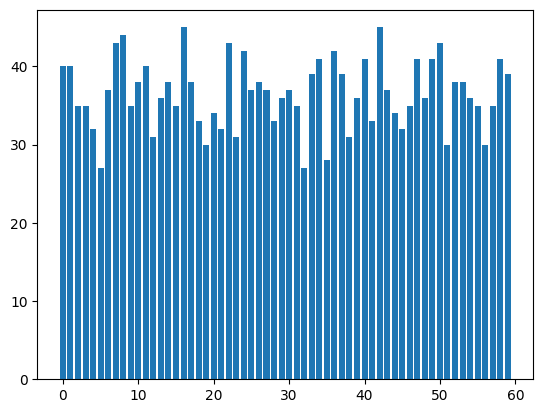

In [19]:
fig, ax = plt.subplots()
ax.bar(range(60), num_list)

In [8]:
# 计算每道题的概率，即患者有多少可能预测该图是AE
# 设概率为预测 AE 的概率
predict_AE_prob_list = []
for i, num in enumerate(num_list):
    predict_AE_num = np.sum(source_df.iloc[:, i] == 2)
    predict_AE_prob = predict_AE_num / num
    predict_AE_prob_list.append(predict_AE_prob)

In [9]:
print(len(predict_AE_prob_list), predict_AE_prob_list[0])

60 0.9


In [15]:
roc_auc_score(answer_list, predict_AE_prob_list)

0.8972222222222221

In [20]:
mask = predict_AE_prob_list >= 0.5

In [33]:
type(predict_AE_prob_list)

numpy.ndarray

In [30]:
predict_result = np.ones(60)
predict_result[mask] = 1
predict_result[~mask] = 0
print(predict_result, mask)

[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.] [ True False False  True  True  True  True  True  True  True  True  True
 False False  True False False False False False False False False  True
 False False False False False False  True False False False False  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False  True  True False  True False  True  True]


In [32]:
accuracy_score(answer_list, predict_result)

0.7666666666666667

In [12]:
# df = pd.DataFrame(columns=['Label', 'Pred'])
# df['Label'] = answer_list
# df['Pred'] = predict_AE_prob_list
# df.to_csv('./resources/graphpad/inves_prob_2023.csv', index=False)

In [ ]:
# 用GraphPad进行验证
# answer_list = np.array(answer_list)
# predict_AE_prob_list = np.array(predict_AE_prob_list)
# roc_auc_score(answer_list, predict_AE_prob_list)
# # 取出所有答案为0或1的概率
# predict_AE_prob_0 = predict_AE_prob_list[answer_list == 0]
# predict_AE_prob_1 = predict_AE_prob_list[answer_list == 1]
# len(predict_AE_prob_0), len(predict_AE_prob_1)
# df = pd.DataFrame(columns=['0_prob', '1_prob'])
# df['0_prob'] = predict_AE_prob_0
# df['1_prob'] = predict_AE_prob_1
# df.head()
# df.to_csv('./resources/source_data/inves_prob_2023.csv', index=False)